<a href="https://colab.research.google.com/github/Sethu-bharathi/humidity-prediction/blob/main/DataScience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Finding relation between Temperature and Humidity**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#Reading the dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/Sethu-bharathi/Datasets/master/Temp%20and%20humidity.csv")
dataset["T=22.0"]=dataset["T=22.0"].astype(str)
dataset.rename(columns={"3/14/19":"Date","19:33:07":"Time","T=22.0":"Temperature","H=20.0":"Humidity"},inplace=True)
dataset

,Date,Time,Temperature,Humidity
0,3/14/19,19:38:10,T=22.0,H=20.0
1,3/14/19,19:43:11,T=22.0,H=26.0
2,3/14/19,19:48:14,T=22.0,H=26.0
3,3/14/19,19:53:15,T=22.0,H=20.0
4,3/14/19,19:58:15,T=22.0,H=23.0
...,...,...,...,...
330,3/15/19,23:48:51,T=18.0,H=28.0
331,3/15/19,23:53:51,T=18.0,H=22.0
332,3/15/19,23:58:52,T=18.0,H=22.0
333,3/16/19,0:03:52,T=18.0,H=22.0



### Date and time are independant variable<br>
###Temperature is a depandant variable



In [ ]:
dataset["Temperature"] = dataset["Temperature"].str.slice(start=2,stop=6)
dataset["Humidity"] = dataset["Humidity"].str.slice(start=2,stop=6)
dataset.to_csv("cleaned_data.csv")

In [ ]:
df=dataset
df["Humidity"].value_counts()

21.0    52
22.0    49
20.0    44
19.0    28
24.0    21
23.0    21
26.0    18
28.0    13
27.0    12
16.0    11
15.0     9
25.0     7
14.0     7
13.0     7
17.0     6
18.0     4
30.0     3
33.0     2
29.0     2
12.0     1
37.0     1
140.     1
Name: Humidity, dtype: int64

In [ ]:
df["Temperature"].value_counts()

21.0    41
19.0    40
18.0    35
22.0    31
20.0    29
16.0    25
23.0    25
17.0    24
ror     16
30.0    12
15.0    11
34.0     7
35.0     7
24.0     7
31.0     5
33.0     3
27.0     3
32.0     3
25.0     2
29.0     2
28.0     2
36.0     2
37.0     1
9.0      1
26.0     1
Name: Temperature, dtype: int64

##There are 16 error values 
Replace them by mean value

In [ ]:
 df = df.replace("ror",np.nan)
 df.Temperature=df.Temperature.astype(float)
 df.Humidity=df.Humidity.astype(float)
 df = df.replace(np.nan,df["Temperature"].mean())
 df.dtypes

Date            object
Time            object
Temperature    float64
Humidity       float64
dtype: object

[Text(0, 0.5, 'Humidity'), Text(0.5, 0, 'Temperature')]

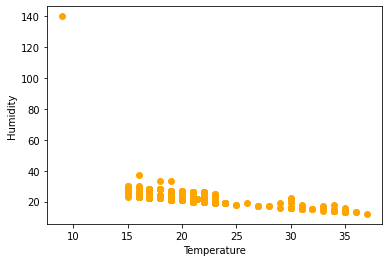

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["Temperature"],df["Humidity"],color="orange")
ax.set(xlabel="Temperature",ylabel="Humidity")


**We should remove the outlier**<br>
**To get better results**<br>
140 is an outlier

In [ ]:
df=df[df["Humidity"]!=140.0]
df.count

<bound method DataFrame.count of         Date      Time  Temperature  Humidity
0    3/14/19  19:38:10         22.0      20.0
1    3/14/19  19:43:11         22.0      26.0
2    3/14/19  19:48:14         22.0      26.0
3    3/14/19  19:53:15         22.0      20.0
4    3/14/19  19:58:15         22.0      23.0
..       ...       ...          ...       ...
330  3/15/19  23:48:51         18.0      28.0
331  3/15/19  23:53:51         18.0      22.0
332  3/15/19  23:58:52         18.0      22.0
333  3/16/19   0:03:52         18.0      22.0
334  3/16/19   0:08:53         18.0      22.0

[334 rows x 4 columns]>

[Text(0, 0.5, 'Humidity'), Text(0.5, 0, 'Temperature')]

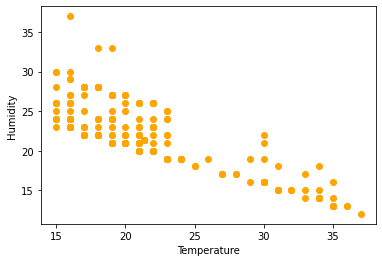

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["Temperature"],df["Humidity"],color="orange")
ax.set(xlabel="Temperature",ylabel="Humidity")

In [ ]:
  x=np.array(df["Temperature"]).reshape(-1,1)
y=np.array(df["Humidity"]).reshape(-1,1)
model=LinearRegression().fit(x,y)
model.functions


AttributeError: ignored

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["Temperature"],df["Humidity"],color="orange")
ax.set(xlabel="Temperature",ylabel="Humidity")
ax.plot(x,model.predict(x))

<h3><b>CONCLUSION</b></h3>
<h4>
 Temperature closly affets humidity<br>
 Temperature and Humidity are inversely proportional<br>
 When Temperature increases Humidity will decrease
 <h4>